# APRENDIZADO

Este notebook serve como material de apoio para os tópicos abordados nos capítulos **Capítulo 18 - Aprendendo com Exemplos**, **Capítulo 19 - Conhecimento na Aprendizagem** e **Capítulo 20 - Aprendendo Modelos Probabilísticos** do livro *Artificial Intelligence: A Modern Approach*. Este notebook utiliza implementações de [learning.py](https://github.com/aimacode/aima-python/blob/master/learning.py). Vamos começar importando tudo do módulo:

In [27]:
from learning import *
from probabilistic_learning import *
from notebook import *

## Conteúdo

* Machine Learning Overview
* Datasets
* Iris Visualization
* Distance Functions
* Plurality Learner
* k-Nearest Neighbours
* Decision Tree Learner
* Random Forest Learner
* Naive Bayes Learner
* Perceptron
* Learner Evaluation

## VISÃO GERAL DE APRENDIZADO DE MÁQUINA

Neste notebook, aprendemos sobre agentes que podem melhorar seu comportamento por meio do estudo diligente de suas próprias experiências.

Um agente está **aprendendo** se melhora seu desempenho em tarefas futuras após fazer observações sobre o mundo.

Há três tipos de feedback que determinam os três principais tipos de aprendizado:

* **Aprendizado Supervisionado**:

No Aprendizado Supervisionado, o agente observa alguns pares de entrada-saída de exemplo e aprende uma função que faz a correspondência entre entrada e saída.

**Exemplo**: Pense em um agente para classificar imagens contendo gatos ou cachorros. Se fornecermos uma imagem contendo um gato ou um cachorro, este agente deve produzir uma string "gato" ou "cachorro" para essa imagem específica. Para ensinar esse agente, daremos muitos pares entrada-saída como {imagem de gato-"gato"}, {imagem de cachorro-"cachorro"} ao agente. O agente então aprende uma função que faz a correspondência entre uma imagem de entrada e uma dessas strings.

* **Aprendizado Não Supervisionado**:

No Aprendizado Não Supervisionado, o agente aprende padrões nos dados de entrada mesmo sem receber feedback explícito. O tipo mais comum é o **agrupamento (clustering)**: detectar agrupamentos potencialmente úteis de exemplos de entrada.

**Exemplo**: Um agente de táxi poderia desenvolver o conceito de *dias de tráfego bom* e *dias de tráfego ruim* sem nunca receber exemplos rotulados.

* **Aprendizado por Reforço**:

No Aprendizado por Reforço, o agente aprende a partir de uma série de reforços—recompensas ou punições.

**Exemplo**: Vamos falar sobre um agente para jogar o popular jogo Atari—[Pong](http://www.ponggame.org). Recompensamos o agente com um ponto para cada movimento correto e deduzimos um ponto para cada movimento errado. Eventualmente, o agente descobrirá quais de suas ações, antes do reforço, foram mais responsáveis pelo resultado.

## CONJUNTOS DE DADOS

Nos tutoriais a seguir, utilizaremos uma variedade de conjuntos de dados para demonstrar melhor os pontos fortes e fracos dos algoritmos. Os conjuntos de dados são os seguintes:

* [Iris de Fisher](https://github.com/aimacode/aima-data/blob/a21fc108f52ad551344e947b0eb97df82f8d2b2b/iris.csv): Cada item representa uma flor, com quatro medidas: o comprimento e a largura das sépalas e das pétalas. Cada item/flor é categorizado em uma das três espécies: Setosa, Versicolor e Virginica.

* [Zoo](https://github.com/aimacode/aima-data/blob/a21fc108f52ad551344e947b0eb97df82f8d2b2b/zoo.csv): Este conjunto de dados contém diferentes animais e sua classificação como "mamífero", "peixe", etc. O novo animal que queremos classificar possui as seguintes características: 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1 (não se preocupe com o significado dessas características).

* **Decisão de Restaurante**: Um conjunto de dados hipotético que ajuda a determinar se um grupo deve ir a um restaurante com base em uma série de fatores, como: se a comida é boa, se o tempo de espera é razoável, se há alternativas próximas e se o restaurante é recomendado por amigos. Este conjunto é usado para treinar modelos em problemas de classificação baseados em múltiplos critérios de decisão.

Para facilitar o uso dos conjuntos de dados, escrevemos uma classe chamada `DataSet` em `learning.py`. Os tutoriais encontrados aqui fazem uso dessa classe.

Vamos dar uma olhada em como ela funciona antes de começarmos com os algoritmos.

### Introdução

Muitos dos conjuntos de dados com os quais trabalharemos são arquivos no formato `.csv` (embora outros formatos também sejam suportados). Temos uma coleção de conjuntos de dados prontos para uso [no aima-data](https://github.com/aimacode/aima-data/tree/a21fc108f52ad551344e947b0eb97df82f8d2b2b) e na pasta **data** da disciplina, que inclui os conjuntos necessários para os exemplos e exercícios abordados. Dois exemplos são os conjuntos de dados mencionados acima (*iris.csv* e *zoo.csv*). 

Há também muitos conjuntos de dados disponíveis online, e um bom repositório para encontrá-los é o [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html).

Em arquivos como esses, cada linha corresponde a um item/medição. Cada valor individual em uma linha representa uma *característica* (feature), e geralmente há um valor que indica a *classe* do item.

Você pode encontrar o código para o conjunto de dados aqui: 

In [28]:
%psource DataSet

class DataSet:
    """
    A data set for a machine learning problem. It has the following fields:

    d.examples   A list of examples. Each one is a list of attribute values.
    d.attrs      A list of integers to index into an example, so example[attr]
                 gives a value. Normally the same as range(len(d.examples[0])).
    d.attr_names Optional list of mnemonic names for corresponding attrs.
    d.target     The attribute that a learning algorithm will try to predict.
                 By default the final attribute.
    d.inputs     The list of attrs without the target.
    d.values     A list of lists: each sublist is the set of possible
                 values for the corresponding attribute. If initially None,
                 it is computed from the known examples by self.set_problem.
                 If not None, an erroneous value raises ValueError.
    d.distance   A function from a pair of examples to a non-negative number.
                 Should be symmetric, e

### Atributos da Classe

* **examples**: Armazena os itens do conjunto de dados. Cada item é uma lista de valores.

* **attrs**: Índices das características (por padrão, no intervalo [0, f), onde *f* é o número de características). Por exemplo, `item[i]` retorna a característica no índice *i* de *item*.

* **attrnames**: Uma lista opcional com os nomes das características. Por exemplo, `item[s]`, onde *s* é o nome de uma característica, retorna a característica com o nome *s* em *item*.

* **target**: A característica que um algoritmo de aprendizado tentará prever. Por padrão, é o último atributo.

* **inputs**: Lista de características sem incluir o *target*.

* **values**: Uma lista de listas que contém o conjunto de valores possíveis para cada característica/atributo correspondente. Se inicialmente for `None`, será calculado (pela função `setproblem`) com base nos exemplos.

* **distance**: A função de distância usada pelo algoritmo de aprendizado para calcular a distância entre dois itens. Por padrão, é `mean_boolean_error`.

* **name**: Nome do conjunto de dados.

* **source**: A fonte do conjunto de dados (URL ou outro). Não é usada no código.

* **exclude**: Uma lista de índices a serem excluídos de `inputs`. A lista pode incluir índices de características (*attrs*) ou nomes (*attrnames*).

### Funções Auxiliares da Classe

Essas funções auxiliam na modificação de um objeto `DataSet` conforme suas necessidades.

* **sanitize**: Recebe como entrada um exemplo e retorna esse exemplo com os atributos que não são de entrada (*target*) substituídos por `None`. Útil para testes. Lembre-se de que o exemplo fornecido não é modificado diretamente; em vez disso, uma cópia sanitizada é retornada.

* **classes_to_numbers**: Mapeia os nomes das classes de um conjunto de dados para números. Se os nomes das classes não forem fornecidos, eles são calculados a partir dos valores do conjunto de dados. Útil para classificadores que retornam valores numéricos em vez de strings.

* **remove_examples**: Remove exemplos que contenham um valor específico. Útil para excluir exemplos com valores ausentes ou para remover classes (necessário para classificadores binários).

### Importando um Conjunto de Dados

#### Importando do aima-data

Os conjuntos de dados disponibilizados no aima-data podem ser importados com a seguinte linha:

In [29]:
iris = DataSet(name="iris")

To check that we imported the correct dataset, we can do the following:

In [30]:
print(iris.examples[0])
print(iris.inputs)

[5.1, 3.5, 1.4, 0.2, 'setosa']
[0, 1, 2, 3]


Que imprime corretamente a primeira linha do arquivo CSV e a lista de índices dos atributos.








Ao importar um conjunto de dados, podemos especificar a exclusão de um atributo (por exemplo, no índice 1) definindo o parâmetro `exclude` para o índice ou nome do atributo.

In [31]:
iris2 = DataSet(name="iris",exclude=[1])
print(iris2.inputs)

[0, 2, 3]


### Atributos

Aqui, apresentamos os atributos.

Primeiro, iremos imprimir os três primeiros itens/exemplos no conjunto de dados.

In [32]:
print(iris.examples[:3])

[[5.1, 3.5, 1.4, 0.2, 'setosa'], [4.9, 3.0, 1.4, 0.2, 'setosa'], [4.7, 3.2, 1.3, 0.2, 'setosa']]


Em seguida, iremos imprimir `attrs`, `attrnames`, `target` e `inputs`. Observe que `attrs` contém valores no intervalo [0,4], mas como o quarto atributo é o *target*, `inputs` contém valores no intervalo [0,3].

In [33]:
print("attrs:", iris.attrs)
print("attrnames (by default same as attrs):", iris.attr_names)
print("target:", iris.target)
print("inputs:", iris.inputs)

attrs: [0, 1, 2, 3, 4]
attrnames (by default same as attrs): [0, 1, 2, 3, 4]
target: 4
inputs: [0, 1, 2, 3]


Agora, iremos imprimir todos os valores possíveis para a primeira característica/atributo.

In [34]:
print(iris.values[0])

[4.7, 5.5, 5.0, 4.9, 5.1, 4.6, 5.4, 4.4, 4.8, 4.3, 5.8, 7.0, 7.1, 4.5, 5.9, 5.6, 6.9, 6.5, 6.4, 6.6, 6.0, 6.1, 7.6, 7.4, 7.9, 5.7, 5.3, 5.2, 6.3, 6.7, 6.2, 6.8, 7.3, 7.2, 7.7]


Por fim, iremos imprimir o nome e a fonte do conjunto de dados. Lembre-se de que não definimos uma fonte para o conjunto de dados, então, neste caso, ela estará vazia.

In [35]:
print("name:", iris.name)
print("source:", iris.source)

name: iris
source: 


Uma combinação útil das informações acima é `dataset.values[dataset.target]`, que retorna os valores possíveis do *target*. Para problemas de classificação, isso retornará todas as classes possíveis. Vamos testar:

In [36]:
print(iris.values[iris.target])

['setosa', 'versicolor', 'virginica']


### Helper Functions

Agora, vamos explorar as funções auxiliares encontradas na classe.

Primeiro, veremos a função `sanitize`, que define os valores não relacionados à entrada (*non-input*) do exemplo fornecido como `None`.

Neste caso, queremos ocultar a classe do primeiro exemplo, então iremos sanitizá-lo.

Observe que a função não altera o exemplo fornecido; ela retorna uma *cópia* sanitizada dele.

In [37]:
print("Sanitized:",iris.sanitize(iris.examples[0]))
print("Original:",iris.examples[0])

Sanitized: [5.1, 3.5, 1.4, 0.2, None]
Original: [5.1, 3.5, 1.4, 0.2, 'setosa']


Atualmente, o conjunto de dados `iris` possui três classes: setosa, virginica e versicolor. No entanto, queremos convertê-lo em um conjunto de dados de classe binária (um conjunto com duas classes). A classe que queremos remover é "virginica". Para isso, utilizaremos a função auxiliar `remove_examples`.

In [38]:
iris2 = DataSet(name="iris")

iris2.remove_examples("virginica")
print(iris2.values[iris2.target])

['setosa', 'versicolor']


Também temos a função `classes_to_numbers`. Para muitos dos classificadores do módulo (como a Rede Neural), as classes devem ter valores numéricos. Com essa função, mapeamos os nomes das classes em formato de string para números.

In [39]:
print("Class of first example:",iris2.examples[0][iris2.target])
iris2.classes_to_numbers()
print("Class of first example:",iris2.examples[0][iris2.target])

Class of first example: setosa
Class of first example: 0


Como você pode ver, "setosa" foi mapeada para 0.

Por fim, vamos analisar a função `find_means_and_deviations`. Ela calcula as médias e os desvios padrão das características para cada classe.

In [40]:
means, deviations = iris.find_means_and_deviations()

print("Setosa feature means:", means["setosa"])
print("Versicolor mean for first feature:", means["versicolor"][0])

print("Setosa feature deviations:", deviations["setosa"])
print("Virginica deviation for second feature:",deviations["virginica"][1])

Setosa feature means: [5.006, 3.418, 1.464, 0.244]
Versicolor mean for first feature: 5.936
Setosa feature deviations: [0.3524896872134513, 0.38102439795469095, 0.17351115943644543, 0.10720950308167838]
Virginica deviation for second feature: 0.32249663817263746


## VISUALIZAÇÃO DO IRIS

Como utilizaremos extensivamente o conjunto de dados *iris* neste notebook, abaixo fornecemos uma ferramenta de visualização que ajuda a compreender o conjunto de dados e, consequentemente, o funcionamento dos algoritmos.

Plotamos o conjunto de dados em um espaço 3D utilizando `matplotlib` e a função `show_iris` de `notebook.py`. A função recebe como entrada três parâmetros, *i*, *j* e *k*, que correspondem aos índices das características do *iris*: "Comprimento da Sépala" (*Sepal Length*), "Largura da Sépala" (*Sepal Width*), "Comprimento da Pétala" (*Petal Length*) e "Largura da Pétala" (*Petal Width*) (0 a 3). Por padrão, mostramos as três primeiras características.

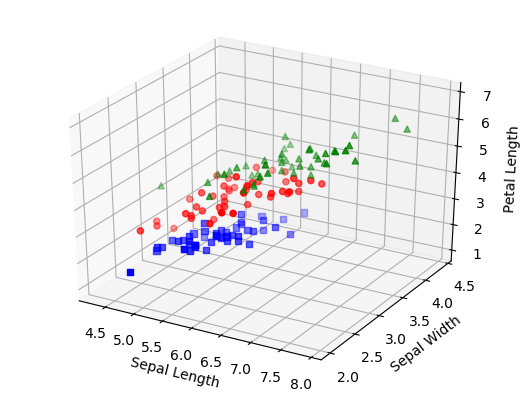

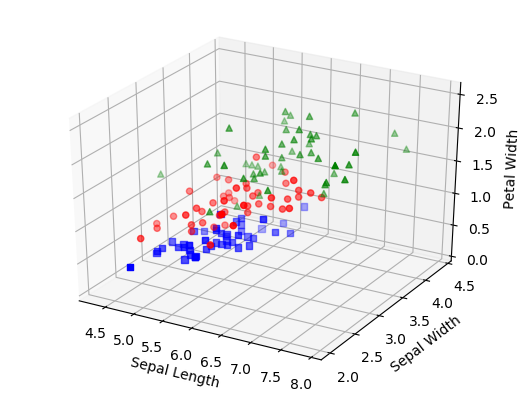

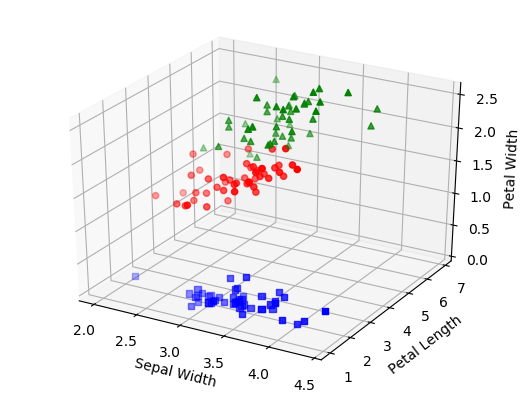

In [15]:
iris = DataSet(name="iris")

show_iris()
show_iris(0, 1, 3)
show_iris(1, 2, 3)

Você pode experimentar diferentes valores para obter uma boa visualização do conjunto de dados.

## FUNÇÕES DE DISTÂNCIA

Em muitos algoritmos (como o algoritmo *k-Nearest Neighbors*), há a necessidade de comparar itens para determinar o quão *similares* ou *próximos* eles são. Para isso, temos várias funções à nossa disposição. Abaixo estão as funções implementadas no módulo:

### Distância de Manhattan (`manhattan_distance`)

Uma das funções de distância mais simples. Ela calcula a diferença entre as coordenadas/características de dois itens. Para entender como funciona, imagine uma grade 2D com coordenadas *x* e *y*. Nessa grade, temos dois itens posicionados nos quadrados `(1,2)` e `(3,4)`. A diferença entre suas coordenadas é `3-1=2` e `4-2=2`. Se somarmos essas diferenças, obtemos `4`. Isso significa que, para ir de `(1,2)` para `(3,4)`, precisamos de quatro movimentos: dois para a direita e dois para cima. A função funciona de forma semelhante para grades n-dimensionais.

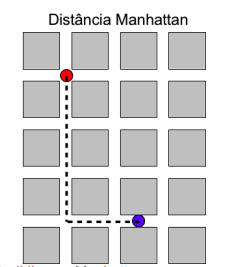

In [41]:
def manhattan_distance(X, Y):
    return sum([abs(x - y) for x, y in zip(X, Y)])


distance = manhattan_distance([1,2], [3,4])
print("Manhattan Distance between (1,2) and (3,4) is", distance)

Manhattan Distance between (1,2) and (3,4) is 4


### Distância Euclidiana (`euclidean_distance`)

Provavelmente a função de distância mais popular. Ela retorna a raiz quadrada da soma das diferenças quadradas entre os elementos individuais de dois itens.

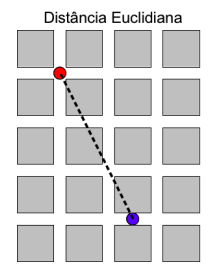

In [44]:
import math
def euclidean_distance(X, Y):
    return math.sqrt(sum([(x - y)**2 for x, y in zip(X,Y)]))


distance = euclidean_distance([1,2], [3,4])
print("Euclidean Distance between (1,2) and (3,4) is", distance)

Euclidean Distance between (1,2) and (3,4) is 2.8284271247461903


### Distância de Hamming (`hamming_distance`)

Esta função conta o número de diferenças entre elementos individuais de dois itens. Por exemplo, se tivermos duas strings binárias "111" e "011", a função retornará 1, pois as duas strings diferem apenas no primeiro elemento. A função também funciona da mesma forma para strings não binárias.

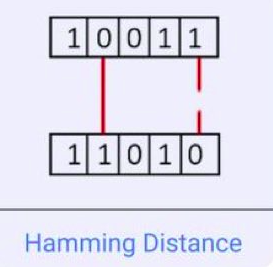

In [46]:
def hamming_distance(X, Y):
    return sum(x != y for x, y in zip(X, Y))


distance = hamming_distance(['a','b','c'], ['a','b','b'])
print("Hamming Distance between 'abc' and 'abb' is", distance)

Hamming Distance between 'abc' and 'abb' is 1


### Erro Booleano Médio (`mean_boolean_error`)

Para calcular essa distância, determinamos a razão entre os elementos diferentes e o total de elementos de dois itens. Por exemplo, se os dois itens forem `(1,2,3)` e `(1,4,5)`, a razão entre os elementos diferentes e o total é 2/3, já que eles diferem em dois de três elementos.

In [47]:
def mean_boolean_error(X, Y):
    return mean(int(x != y) for x, y in zip(X, Y))


distance = mean_boolean_error([1,2,3], [1,4,5])
print("Mean Boolean Error Distance between (1,2,3) and (1,4,5) is", distance)

Mean Boolean Error Distance between (1,2,3) and (1,4,5) is 0.6666666666666666


### Erro Médio (`mean_error`)

Essa função calcula a diferença média entre os elementos individuais de dois itens. Por exemplo, se os dois itens forem `(1,0,5)` e `(3,10,5)`, a distância de erro será `(3-1) + (10-0) + (5-5) = 2 + 10 + 0 = 12`. Assim, o erro médio será `12/3 = 4`.

In [48]:
def mean_error(X, Y):
    return mean([abs(x - y) for x, y in zip(X, Y)])


distance = mean_error([1,0,5], [3,10,5])
print("Mean Error Distance between (1,0,5) and (3,10,5) is", distance)

Mean Error Distance between (1,0,5) and (3,10,5) is 4


### Erro Quadrático Médio (`ms_error`)

É muito semelhante ao `Erro Médio`, mas, em vez de calcular apenas a diferença entre os elementos, calculamos o *quadrado* das diferenças.

In [49]:
def ms_error(X, Y):
    return mean([(x - y)**2 for x, y in zip(X, Y)])


distance = ms_error([1,0,5], [3,10,5])
print("Mean Square Distance between (1,0,5) and (3,10,5) is", distance)

Mean Square Distance between (1,0,5) and (3,10,5) is 34.666666666666664


### Raiz do Erro Quadrático Médio (`rms_error`)

É a raiz quadrada do `Erro Quadrático Médio`.

In [50]:
def rms_error(X, Y):
    return math.sqrt(ms_error(X, Y))


distance = rms_error([1,0,5], [3,10,5])
print("Root of Mean Error Distance between (1,0,5) and (3,10,5) is", distance)

Root of Mean Error Distance between (1,0,5) and (3,10,5) is 5.887840577551898


## K-NEAREST NEIGHBOURS CLASSIFIER

### Visão Geral

O algoritmo *k-Nearest Neighbors* (kNN) é um método não paramétrico usado para classificação e regressão. Vamos utilizá-lo para classificar flores do conjunto de dados Iris. Saiba mais sobre o kNN em [Scholarpedia](http://www.scholarpedia.org/article/K-nearest_neighbor).

![kNN plot](images/knn_plot.png)

Vamos entender como o kNN funciona com um exemplo simples mostrado no gráfico acima.

Temos as coordenadas (chamadas de **características** em aprendizado de máquina) de uma estrela vermelha, e precisamos prever sua classe usando o algoritmo kNN. Nesse algoritmo, o valor de **k** é arbitrário. **k** é um dos **hiperparâmetros** do algoritmo kNN. Escolhemos esse número com base no nosso conjunto de dados, e essa escolha é conhecida como **ajuste/otimização de hiperparâmetro**. Vamos aprender mais sobre isso em tópicos futuros.

Vamos definir **k = 3**. Isso significa que precisamos encontrar os 3 vizinhos mais próximos dessa estrela vermelha e classificá-la na classe majoritária. Observe o círculo menor, que contém três pontos além do **ponto de teste** (estrela vermelha). Como há dois pontos violetas, que formam a maioria, prevemos a classe da estrela vermelha como **violeta - Classe B**.

Da mesma forma, se definirmos **k = 5**, você pode observar que há três pontos amarelos, que formam a maioria. Assim, classificamos nosso ponto de teste como **amarelo - Classe A**.

Em tarefas práticas, iteramos por vários valores de k (como [1, 3, 5, 10, 20, 50, 100]), analisamos o desempenho e selecionamos o melhor valor.

### Implementation

Below follows the implementation of the kNN algorithm:

In [51]:
psource(NearestNeighborLearner)

A função recebe como entrada um conjunto de dados e o valor de **k** (o valor padrão é 1) e retorna uma função que podemos usar posteriormente para classificar um novo item.

Para isso, a função utiliza uma *heap-queue* (fila de prioridade), onde os itens do conjunto de dados são ordenados de acordo com sua distância do *example* (o item a ser classificado). Em seguida, selecionamos os **k** menores elementos dessa *heap-queue* e determinamos a classe majoritária. Classificamos o item na classe majoritária encontrada.

### Exemplo

Medimos uma nova flor com os seguintes valores: 5.1, 3.0, 1.1, 0.1. Queremos classificar essa flor em uma classe. Para isso, escrevemos o seguinte:

In [53]:
iris = DataSet(name="iris")

kNN = NearestNeighborLearner(iris,k=3)
print(kNN([5.1,3.0,1.1,0.1]))

setosa


A saída do código acima é "setosa", o que significa que a flor com as medidas fornecidas pertence à espécie "setosa".

### K-Nearest Neighbors (KNN) Classification com scikit-learn

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
import numpy as np
import pandas as pd

df = pd.read_csv("./aima-data/iris.csv", header=None)
# Split the data into features (X) and target (y)
X = df.drop([4], axis=1)
y = df[4]
print(X)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
input_data = np.array([5.1, 3.0, 1.1, 0.1]).reshape(1, -1)
print(knn.predict(input_data))

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]
['setosa']


In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Carregar o dataset
df = pd.read_csv("./aima-data/iris.csv", header=None)

# Dividir os dados em features (X) e alvo (y)
X = df.drop([4], axis=1)
y = df[4]

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Avaliar o modelo com o conjunto de teste
score = knn.score(X_test, y_test)
print(f"Acurácia no conjunto de teste: {score:.2f}")

# Fazer uma previsão com dados de entrada
input_data = np.array([5.1, 3.0, 1.1, 0.1]).reshape(1, -1)
prediction = knn.predict(input_data)
print(f"Classe prevista para os dados de entrada: {prediction[0]}")


Acurácia no conjunto de teste: 1.00
Classe prevista para os dados de entrada: setosa


## DECISION TREE LEARNER

### Overview

#### Decision Trees
A decision tree is a flowchart that uses a tree of decisions and their possible consequences for classification. At each non-leaf node of the tree an attribute of the input is tested, based on which corresponding branch leading to a child-node is selected. At the leaf node the input is classified based on the class label of this leaf node. The paths from root to leaves represent classification rules based on which leaf nodes are assigned class labels.
![perceptron](images/decisiontree_fruit.jpg)
#### Decision Tree Learning
Decision tree learning is the construction of a decision tree from class-labeled training data. The data is expected to be a tuple in which each record of the tuple is an attribute used for classification. The decision tree is built top-down, by choosing a variable at each step that best splits the set of items. There are different metrics for measuring the "best split". These generally measure the homogeneity of the target variable within the subsets.

#### Gini Impurity
Gini impurity of a set is the probability of a randomly chosen element to be incorrectly labeled if it was randomly labeled according to the distribution of labels in the set.

$$I_G(p) = \sum{p_i(1 - p_i)} = 1 - \sum{p_i^2}$$

We select a split which minimizes the Gini impurity in child nodes.

#### Information Gain
Information gain is based on the concept of entropy from information theory. Entropy is defined as:

$$H(p) = -\sum{p_i \log_2{p_i}}$$

Information Gain is difference between entropy of the parent and weighted sum of entropy of children. The feature used for splitting is the one which provides the most information gain.

#### Pseudocode

You can view the pseudocode by running the cell below:

In [ ]:
pseudocode("Decision Tree Learning")

### Implementation
The nodes of the tree constructed by our learning algorithm are stored using either `DecisionFork` or `DecisionLeaf` based on whether they are a parent node or a leaf node respectively.

In [ ]:
psource(DecisionFork)

`DecisionFork` holds the attribute, which is tested at that node, and a dict of branches. The branches store the child nodes, one for each of the attribute's values. Calling an object of this class as a function with input tuple as an argument returns the next node in the classification path based on the result of the attribute test.

In [ ]:
psource(DecisionLeaf)

The leaf node stores the class label in `result`. All input tuples' classification paths end on a `DecisionLeaf` whose `result` attribute decide their class.

In [ ]:
psource(DecisionTreeLearner)

The implementation of `DecisionTreeLearner` provided in [learning.py](https://github.com/aimacode/aima-python/blob/master/learning.py) uses information gain as the metric for selecting which attribute to test for splitting. The function builds the tree top-down in a recursive manner. Based on the input it makes one of the four choices:
<ol>
<li>If the input at the current step has no training data we return the mode of classes of input data received in the parent step (previous level of recursion).</li>
<li>If all values in training data belong to the same class it returns a `DecisionLeaf` whose class label is the class which all the data belongs to.</li>
<li>If the data has no attributes that can be tested we return the class with highest plurality value in the training data.</li>
<li>We choose the attribute which gives the highest amount of entropy gain and return a `DecisionFork` which splits based on this attribute. Each branch recursively calls `decision_tree_learning` to construct the sub-tree.</li>
</ol>

### Example

We will now use the Decision Tree Learner to classify a sample with values: 5.1, 3.0, 1.1, 0.1.

In [2]:
iris = DataSet(name="iris")

DTL = DecisionTreeLearner(iris)
print(DTL([5.1, 3.0, 1.1, 0.1]))

setosa


As expected, the Decision Tree learner classifies the sample as "setosa" as seen in the previous section.

## RANDOM FOREST LEARNER

### Overview

![random_forest.png](images/random_forest.png)   
Image via [src](https://cdn-images-1.medium.com/max/800/0*tG-IWcxL1jg7RkT0.png)

#### Random Forest

As the name of the algorithm and image above suggest, this algorithm creates the forest with a number of trees. The more number of trees makes the forest robust. In the same way in random forest algorithm, the higher the number of trees in the forest, the higher is the accuray result. The main difference between Random Forest and Decision trees is that, finding the root node and splitting the feature nodes will be random.  

Let's see how Rnadom Forest Algorithm work :   
Random Forest Algorithm works in two steps, first is the creation of random forest and then the prediction. Let's first see the creation :  

The first step in creation is to randomly select 'm' features out of total 'n' features. From these 'm' features calculate the node d using the best split point and then split the node into further nodes using best split. Repeat these steps until 'i' number of nodes are reached. Repeat the entire whole process to build the forest.  

Now, let's see how the prediction works
Take the test features and predict the outcome for each randomly created decision tree. Calculate the votes for each prediction and the prediction which gets the highest votes would be the final prediction.


### Implementation

Below mentioned is the implementation of Random Forest Algorithm.

In [ ]:
psource(RandomForest)

This algorithm creates an ensemble of decision trees using bagging and feature bagging. It takes 'm' examples randomly from the total number of examples and then perform feature bagging with probability p to retain an attribute. All the predictors are predicted from the DecisionTreeLearner and then a final prediction is made.


### Example

We will now use the Random Forest to classify a sample with values: 5.1, 3.0, 1.1, 0.1.

In [4]:
iris = DataSet(name="iris")

DTL = RandomForest(iris)
print(DTL([5.1, 3.0, 1.1, 0.1]))

['versicolor', 'setosa', 'setosa', 'setosa', 'setosa']
setosa


As expected, the Random Forest classifies the sample as "setosa".

## NAIVE BAYES LEARNER

### Overview

#### Theory of Probabilities

The Naive Bayes algorithm is a probabilistic classifier, making use of [Bayes' Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem). The theorem states that the conditional probability of **A** given **B** equals the conditional probability of **B** given **A** multiplied by the probability of **A**, divided by the probability of **B**.

$$P(A|B) = \dfrac{P(B|A)*P(A)}{P(B)}$$

From the theory of Probabilities we have the Multiplication Rule, if the events *X* are independent the following is true:

$$P(X_{1} \cap X_{2} \cap ... \cap X_{n}) = P(X_{1})*P(X_{2})*...*P(X_{n})$$

For conditional probabilities this becomes:

$$P(X_{1}, X_{2}, ..., X_{n}|Y) = P(X_{1}|Y)*P(X_{2}|Y)*...*P(X_{n}|Y)$$

#### Classifying an Item

How can we use the above to classify an item though?

We have a dataset with a set of classes (**C**) and we want to classify an item with a set of features (**F**). Essentially what we want to do is predict the class of an item given the features.

For a specific class, **Class**, we will find the conditional probability given the item features:

$$P(Class|F) = \dfrac{P(F|Class)*P(Class)}{P(F)}$$

We will do this for every class and we will pick the maximum. This will be the class the item is classified in.

The features though are a vector with many elements. We need to break the probabilities up using the multiplication rule. Thus the above equation becomes:

$$P(Class|F) = \dfrac{P(Class)*P(F_{1}|Class)*P(F_{2}|Class)*...*P(F_{n}|Class)}{P(F_{1})*P(F_{2})*...*P(F_{n})}$$

The calculation of the conditional probability then depends on the calculation of the following:

*a)* The probability of **Class** in the dataset.

*b)* The conditional probability of each feature occurring in an item classified in **Class**.

*c)* The probabilities of each individual feature.

For *a)*, we will count how many times **Class** occurs in the dataset (aka how many items are classified in a particular class).

For *b)*, if the feature values are discrete ('Blue', '3', 'Tall', etc.), we will count how many times a feature value occurs in items of each class. If the feature values are not discrete, we will go a different route. We will use a distribution function to calculate the probability of values for a given class and feature. If we know the distribution function of the dataset, then great, we will use it to compute the probabilities. If we don't know the function, we can assume the dataset follows the normal (Gaussian) distribution without much loss of accuracy. In fact, it can be proven that any distribution tends to the Gaussian the larger the population gets (see [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)).

*NOTE:* If the values are continuous but use the discrete approach, there might be issues if we are not lucky. For one, if we have two values, '5.0 and 5.1', with the discrete approach they will be two completely different values, despite being so close. Second, if we are trying to classify an item with a feature value of '5.15', if the value does not appear for the feature, its probability will be 0. This might lead to misclassification. Generally, the continuous approach is more accurate and more useful, despite the overhead of calculating the distribution function.

The last one, *c)*, is tricky. If feature values are discrete, we can count how many times they occur in the dataset. But what if the feature values are continuous? Imagine a dataset with a height feature. Is it worth it to count how many times each value occurs? Most of the time it is not, since there can be miscellaneous differences in the values (for example, 1.7 meters and 1.700001 meters are practically equal, but they count as different values).

So as we cannot calculate the feature value probabilities, what are we going to do?

Let's take a step back and rethink exactly what we are doing. We are essentially comparing conditional probabilities of all the classes. For two classes, **A** and **B**, we want to know which one is greater:

$$\dfrac{P(F|A)*P(A)}{P(F)} vs. \dfrac{P(F|B)*P(B)}{P(F)}$$

Wait, **P(F)** is the same for both the classes! In fact, it is the same for every combination of classes. That is because **P(F)** does not depend on a class, thus being independent of the classes.

So, for *c)*, we actually don't need to calculate it at all.

#### Wrapping It Up

Classifying an item to a class then becomes a matter of calculating the conditional probabilities of feature values and the probabilities of classes. This is something very desirable and computationally delicious.

Remember though that all the above are true because we made the assumption that the features are independent. In most real-world cases that is not true though. Is that an issue here? Fret not, for the the algorithm is very efficient even with that assumption. That is why the algorithm is called **Naive** Bayes Classifier. We (naively) assume that the features are independent to make computations easier.

### Implementation

The implementation of the Naive Bayes Classifier is split in two; *Learning* and *Simple*. The *learning* classifier takes as input a dataset and learns the needed distributions from that. It is itself split into two, for discrete and continuous features. The *simple* classifier takes as input not a dataset, but already calculated distributions (a dictionary of `CountingProbDist` objects).

#### Discrete

The implementation for discrete values counts how many times each feature value occurs for each class, and how many times each class occurs. The results are stored in a `CountinProbDist` object.

With the below code you can see the probabilities of the class "Setosa" appearing in the dataset and the probability of the first feature (at index 0) of the same class having a value of 5. Notice that the second probability is relatively small, even though if we observe the dataset we will find that a lot of values are around 5. The issue arises because the features in the Iris dataset are continuous, and we are assuming they are discrete. If the features were discrete (for example, "Tall", "3", etc.) this probably wouldn't have been the case and we would see a much nicer probability distribution.

In [30]:
dataset = iris

target_vals = dataset.values[dataset.target]
target_dist = CountingProbDist(target_vals)
attr_dists = {(gv, attr): CountingProbDist(dataset.values[attr])
              for gv in target_vals
              for attr in dataset.inputs}
for example in dataset.examples:
        targetval = example[dataset.target]
        target_dist.add(targetval)
        for attr in dataset.inputs:
            attr_dists[targetval, attr].add(example[attr])


print(target_dist['setosa'])
print(attr_dists['setosa', 0][5.0])

0.3333333333333333
0.10588235294117647


First we found the different values for the classes (called targets here) and calculated their distribution. Next we initialized a dictionary of `CountingProbDist` objects, one for each class and feature. Finally, we iterated through the examples in the dataset and calculated the needed probabilites.

Having calculated the different probabilities, we will move on to the predicting function. It will receive as input an item and output the most likely class. Using the above formula, it will multiply the probability of the class appearing, with the probability of each feature value appearing in the class. It will return the max result.

In [31]:
def predict(example):
    def class_probability(targetval):
        return (target_dist[targetval] *
                product(attr_dists[targetval, attr][example[attr]]
                        for attr in dataset.inputs))
    return argmax(target_vals, key=class_probability)


print(predict([5, 3, 1, 0.1]))

setosa


You can view the complete code by executing the next line:

In [ ]:
psource(NaiveBayesDiscrete)

#### Continuous

In the implementation we use the Gaussian/Normal distribution function. To make it work, we need to find the means and standard deviations of features for each class. We make use of the `find_means_and_deviations` Dataset function. On top of that, we will also calculate the class probabilities as we did with the Discrete approach.

In [33]:
means, deviations = dataset.find_means_and_deviations()

target_vals = dataset.values[dataset.target]
target_dist = CountingProbDist(target_vals)


print(means["setosa"])
print(deviations["versicolor"])

[5.006, 3.418, 1.464, 0.244]
[0.5161711470638634, 0.3137983233784114, 0.46991097723995795, 0.19775268000454405]


You can see the means of the features for the "Setosa" class and the deviations for "Versicolor".

The prediction function will work similarly to the Discrete algorithm. It will multiply the probability of the class occurring with the conditional probabilities of the feature values for the class.

Since we are using the Gaussian distribution, we will input the value for each feature into the Gaussian function, together with the mean and deviation of the feature. This will return the probability of the particular feature value for the given class. We will repeat for each class and pick the max value.

In [34]:
def predict(example):
    def class_probability(targetval):
        prob = target_dist[targetval]
        for attr in dataset.inputs:
            prob *= gaussian(means[targetval][attr], deviations[targetval][attr], example[attr])
        return prob

    return argmax(target_vals, key=class_probability)


print(predict([5, 3, 1, 0.1]))

setosa


The complete code of the continuous algorithm:

In [ ]:
psource(NaiveBayesContinuous)

#### Simple

The simple classifier (chosen with the argument `simple`) does not learn from a dataset, instead it takes as input a dictionary of already calculated `CountingProbDist` objects and returns a predictor function. The dictionary is in the following form: `(Class Name, Class Probability): CountingProbDist Object`.

Each class has its own probability distribution. The classifier given a list of features calculates the probability of the input for each class and returns the max. The only pre-processing work is to create dictionaries for the distribution of classes (named `targets`) and attributes/features.

The complete code for the simple classifier:

In [ ]:
psource(NaiveBayesSimple)

This classifier is useful when you already have calculated the distributions and you need to predict future items.

### Examples

We will now use the Naive Bayes Classifier (Discrete and Continuous) to classify items:

In [36]:
nBD = NaiveBayesLearner(iris, continuous=False)
print("Discrete Classifier")
print(nBD([5, 3, 1, 0.1]))
print(nBD([6, 5, 3, 1.5]))
print(nBD([7, 3, 6.5, 2]))


nBC = NaiveBayesLearner(iris, continuous=True)
print("\nContinuous Classifier")
print(nBC([5, 3, 1, 0.1]))
print(nBC([6, 5, 3, 1.5]))
print(nBC([7, 3, 6.5, 2]))

Discrete Classifier
setosa
setosa
setosa

Continuous Classifier
setosa
versicolor
virginica


Notice how the Discrete Classifier misclassified the second item, while the Continuous one had no problem.

Let's now take a look at the simple classifier. First we will come up with a sample problem to solve. Say we are given three bags. Each bag contains three letters ('a', 'b' and 'c') of different quantities. We are given a string of letters and we are tasked with finding from which bag the string of letters came.

Since we know the probability distribution of the letters for each bag, we can use the naive bayes classifier to make our prediction.

In [2]:
bag1 = 'a'*50 + 'b'*30 + 'c'*15
dist1 = CountingProbDist(bag1)
bag2 = 'a'*30 + 'b'*45 + 'c'*20
dist2 = CountingProbDist(bag2)
bag3 = 'a'*20 + 'b'*20 + 'c'*35
dist3 = CountingProbDist(bag3)

Now that we have the `CountingProbDist` objects for each bag/class, we will create the dictionary. We assume that it is equally probable that we will pick from any bag.

In [3]:
dist = {('First', 0.5): dist1, ('Second', 0.3): dist2, ('Third', 0.2): dist3}
nBS = NaiveBayesLearner(dist, simple=True)

Now we can start making predictions:

In [4]:
print(nBS('aab'))        # We can handle strings
print(nBS(['b', 'b']))   # And lists!
print(nBS('ccbcc'))

First
Second
Third


The results make intuitive sence. The first bag has a high amount of 'a's, the second has a high amount of 'b's and the third has a high amount of 'c's. The classifier seems to confirm this intuition.

Note that the simple classifier doesn't distinguish between discrete and continuous values. It just takes whatever it is given. Also, the `simple` option on the `NaiveBayesLearner` overrides the `continuous` argument. `NaiveBayesLearner(d, simple=True, continuous=False)` just creates a simple classifier.

## PERCEPTRON CLASSIFIER

### Overview

The Perceptron is a linear classifier. It works the same way as a neural network with no hidden layers (just input and output). First it trains its weights given a dataset and then it can classify a new item by running it through the network.

Its input layer consists of the the item features, while the output layer consists of nodes (also called neurons). Each node in the output layer has *n* synapses (for every item feature), each with its own weight. Then, the nodes find the dot product of the item features and the synapse weights. These values then pass through an activation function (usually a sigmoid). Finally, we pick the largest of the values and we return its index.

Note that in classification problems each node represents a class. The final classification is the class/node with the max output value.

Below you can see a single node/neuron in the outer layer. With *f* we denote the item features, with *w* the synapse weights, then inside the node we have the dot product and the activation function, *g*.

![perceptron](images/perceptron.png)

### Implementation

First, we train (calculate) the weights given a dataset, using the `BackPropagationLearner` function of `learning.py`. We then return a function, `predict`, which we will use in the future to classify a new item. The function computes the (algebraic) dot product of the item with the calculated weights for each node in the outer layer. Then it picks the greatest value and classifies the item in the corresponding class.

In [ ]:
psource(PerceptronLearner)

Note that the Perceptron is a one-layer neural network, without any hidden layers. So, in `BackPropagationLearner`, we will pass no hidden layers. From that function we get our network, which is just one layer, with the weights calculated.

That function `predict` passes the input/example through the network, calculating the dot product of the input and the weights for each node and returns the class with the max dot product.

### Example

We will train the Perceptron on the iris dataset. Because though the `BackPropagationLearner` works with integer indexes and not strings, we need to convert class names to integers. Then, we will try and classify the item/flower with measurements of 5, 3, 1, 0.1.

In [38]:
iris = DataSet(name="iris")
iris.classes_to_numbers()

perceptron = PerceptronLearner(iris)
print(perceptron([5, 3, 1, 0.1]))

0


The correct output is 0, which means the item belongs in the first class, "setosa". Note that the Perceptron algorithm is not perfect and may produce false classifications.

## LINEAR LEARNER

### Overview

Linear Learner is a model that assumes a linear relationship between the input variables x and the single output variable y. More specifically, that y can be calculated from a linear combination of the input variables x. Linear learner is a quite simple model as the representation of this model is a linear equation.  

The linear equation assigns one scaler factor to each input value or column, called a coefficients or weights. One additional coefficient is also added, giving additional degree of freedom and is often called the intercept or the bias coefficient.   
For example :  y = ax1 + bx2 + c .  

### Implementation

Below mentioned is the implementation of Linear Learner.

In [ ]:
psource(LinearLearner)

This algorithm first assigns some random weights to the input variables and then based on the error calculated updates the weight for each variable. Finally the prediction is made with the updated weights.  

### Implementation

We will now use the Linear Learner to classify a sample with values: 5.1, 3.0, 1.1, 0.1.

In [21]:
iris = DataSet(name="iris")
iris.classes_to_numbers()

linear_learner = LinearLearner(iris)
print(linear_learner([5, 3, 1, 0.1]))

0.2404650656510341


## ENSEMBLE LEARNER

### Overview

Ensemble Learning improves the performance of our model by combining several learners. It improvise the stability and predictive power of the model. Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance, bias, or improve predictions.  



![ensemble_learner.jpg](images/ensemble_learner.jpg)


Some commonly used Ensemble Learning techniques are : 

1. Bagging : Bagging tries to implement similar learners on small sample populations and then takes a mean of all the predictions. It helps us to reduce variance error.

2. Boosting : Boosting is an iterative technique which adjust the weight of an observation based on the last classification. If an observation was classified incorrectly, it tries to increase the weight of this observation and vice versa. It helps us to reduce bias error.

3.  Stacking : This is a very interesting way of combining models. Here we use a learner to combine output from different learners. It can either decrease bias or variance error depending on the learners we use.

### Implementation

Below mentioned is the implementation of Ensemble Learner.

In [ ]:
psource(EnsembleLearner)

This algorithm takes input as a list of learning algorithms, have them vote and then finally returns the predicted result.

## LEARNER EVALUATION

In this section we will evaluate and compare algorithm performance. The dataset we will use will again be the iris one.

In [42]:
iris = DataSet(name="iris")

### Naive Bayes

First up we have the Naive Bayes algorithm. First we will test how well the Discrete Naive Bayes works, and then how the Continuous fares.

In [43]:
nBD = NaiveBayesLearner(iris, continuous=False)
print("Error ratio for Discrete:", err_ratio(nBD, iris))

nBC = NaiveBayesLearner(iris, continuous=True)
print("Error ratio for Continuous:", err_ratio(nBC, iris))

Error ratio for Discrete: 0.040000000000000036
Error ratio for Continuous: 0.040000000000000036


The error for the Naive Bayes algorithm is very, very low; close to 0. There is also very little difference between the discrete and continuous version of the algorithm.

## k-Nearest Neighbors

Now we will take a look at kNN, for different values of *k*. Note that *k* should have odd values, to break any ties between two classes.

In [44]:
kNN_1 = NearestNeighborLearner(iris, k=1)
kNN_3 = NearestNeighborLearner(iris, k=3)
kNN_5 = NearestNeighborLearner(iris, k=5)
kNN_7 = NearestNeighborLearner(iris, k=7)

print("Error ratio for k=1:", err_ratio(kNN_1, iris))
print("Error ratio for k=3:", err_ratio(kNN_3, iris))
print("Error ratio for k=5:", err_ratio(kNN_5, iris))
print("Error ratio for k=7:", err_ratio(kNN_7, iris))

Error ratio for k=1: 0.0
Error ratio for k=3: 0.06000000000000005
Error ratio for k=5: 0.1266666666666667
Error ratio for k=7: 0.19999999999999996


Notice how the error became larger and larger as *k* increased. This is generally the case with datasets where classes are spaced out, as is the case with the iris dataset. If items from different classes were closer together, classification would be more difficult. Usually a value of 1, 3 or 5 for *k* suffices.

Also note that since the training set is also the testing set, for *k* equal to 1 we get a perfect score, since the item we want to classify each time is already in the dataset and its closest neighbor is itself.

### Perceptron

For the Perceptron, we first need to convert class names to integers. Let's see how it performs in the dataset.

In [45]:
iris2 = DataSet(name="iris")
iris2.classes_to_numbers()

perceptron = PerceptronLearner(iris2)
print("Error ratio for Perceptron:", err_ratio(perceptron, iris2))

Error ratio for Perceptron: 0.31333333333333335


The Perceptron didn't fare very well mainly because the dataset is not linearly separated. On simpler datasets the algorithm performs much better, but unfortunately such datasets are rare in real life scenarios.

## AdaBoost

### Overview

**AdaBoost** is an algorithm which uses **ensemble learning**. In ensemble learning the hypotheses in the collection, or ensemble, vote for what the output should be and the output with the majority votes is selected as the final answer.

AdaBoost algorithm, as mentioned in the book, works with a **weighted training set** and **weak learners** (classifiers that have about 50%+epsilon accuracy i.e slightly better than random guessing). It manipulates the weights attached to the the examples that are showed to it. Importance is given to the examples with higher weights.

All the examples start with equal weights and a hypothesis is generated using these examples. Examples which are incorrectly classified, their weights are increased so that they can be classified correctly by the next hypothesis. The examples that are correctly classified, their weights are reduced. This process is repeated *K* times (here *K* is an input to the algorithm) and hence, *K* hypotheses are generated.

These *K* hypotheses are also assigned weights according to their performance on the weighted training set. The final ensemble hypothesis is the weighted-majority combination of these *K* hypotheses.

The speciality of AdaBoost is that by using weak learners and a sufficiently large *K*, a highly accurate classifier can be learned irrespective of the complexity of the function being learned or the dullness of the hypothesis space.

### Implementation

As seen in the previous section, the `PerceptronLearner` does not perform that well on the iris dataset. We'll use perceptron as the learner for the AdaBoost algorithm and try to increase the accuracy. 

Let's first see what AdaBoost is exactly:

In [3]:
psource(AdaBoost)

AdaBoost takes as inputs: **L** and *K* where **L** is the learner and *K* is the number of hypotheses to be generated. The learner **L** takes in as inputs: a dataset and the weights associated with the examples in the dataset. But the `PerceptronLearner` doesnot handle weights and only takes a dataset as its input.  
To remedy that we will give as input to the PerceptronLearner a modified dataset in which the examples will be repeated according to the weights associated to them. Intuitively, what this will do is force the learner to repeatedly learn the same example again and again until it can classify it correctly.   

To convert `PerceptronLearner` so that it can take weights as input too, we will have to pass it through the **`WeightedLearner`** function.

In [ ]:
psource(WeightedLearner)

The `WeightedLearner` function will then call the `PerceptronLearner`, during each iteration, with the modified dataset which contains the examples according to the weights associated with them.

###  Example

We will pass the `PerceptronLearner` through `WeightedLearner` function. Then we will create an `AdaboostLearner` classifier with number of hypotheses or *K* equal to 5.

In [4]:
WeightedPerceptron = WeightedLearner(PerceptronLearner)
AdaboostLearner = AdaBoost(WeightedPerceptron, 5)

In [5]:
iris2 = DataSet(name="iris")
iris2.classes_to_numbers()

adaboost = AdaboostLearner(iris2)

adaboost([5, 3, 1, 0.1])

0

That is the correct answer. Let's check the error rate of adaboost with perceptron.

In [6]:
print("Error ratio for adaboost: ", err_ratio(adaboost, iris2))

Error ratio for adaboost:  0.046666666666666634


It reduced the error rate considerably. Unlike the `PerceptronLearner`, `AdaBoost` was able to learn the complexity in the iris dataset.